## Ordinary Least Squares
Linearregression fit a linear model.

In [1]:
print(__doc__)
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets,linear_model
from sklearn.metrics import mean_squared_error, r2_score

Automatically created module for IPython interactive environment


Loading the diabetes dataset

In [2]:
diabetes=datasets.load_diabetes()

In [3]:
print(diabetes.DESCR)

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

In [4]:
diabetes_X=diabetes.data[:,np.newaxis,2]
diabetes_Y=diabetes.target
diabetes_Y=diabetes_Y.reshape(len(diabetes_Y),1)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train,X_test,Y_train,Y_test=train_test_split(diabetes_X,diabetes_Y,test_size=0.33)

In [7]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(296, 1)
(146, 1)
(296, 1)
(146, 1)


In [8]:
regr=linear_model.LinearRegression()
regr.fit(X_train,Y_train)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
pred=regr.predict(X_test)

In [10]:
print('Coefficient: \n',regr.coef_)
print("Mean squared error: %.2f"%mean_squared_error(Y_test,pred))
print("variance socre : %.2f"%r2_score(Y_test,pred))

Coefficient: 
 [[ 971.19522769]]
Mean squared error: 4077.25
variance socre : 0.35


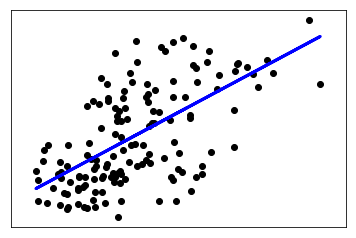

In [11]:
plt.scatter(X_test,Y_test,c='black')
plt.plot(X_test,pred,c='blue',linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

# Ridge Regression
Ridge regression address some of the problems of Ordinary Least Squares by imposing a penalty on the size of coefficients. The ridge ceficients minimize a penalized residual sum of squares,
$$min{\substack{w}}||Xw-y||_2^2+\alpha||w||_2^2 $$

In [12]:
print(__doc__)
X=1./(np.arange(1,11)+np.arange(0,10)[:,np.newaxis])

Automatically created module for IPython interactive environment


In [13]:
print(X.shape)

(10, 10)


In [14]:
Y=np.ones(10)
Y.shape

(10,)

In [15]:
n_alphas=200
alphas=np.logspace(-10,-2,n_alphas)
alphas.shape

(200,)

In [16]:
coefs=[]
for a in alphas:
    ridge=linear_model.Ridge(alpha=a,fit_intercept=False)
    ridge.fit(X,Y)
    coefs.append(ridge.coef_)

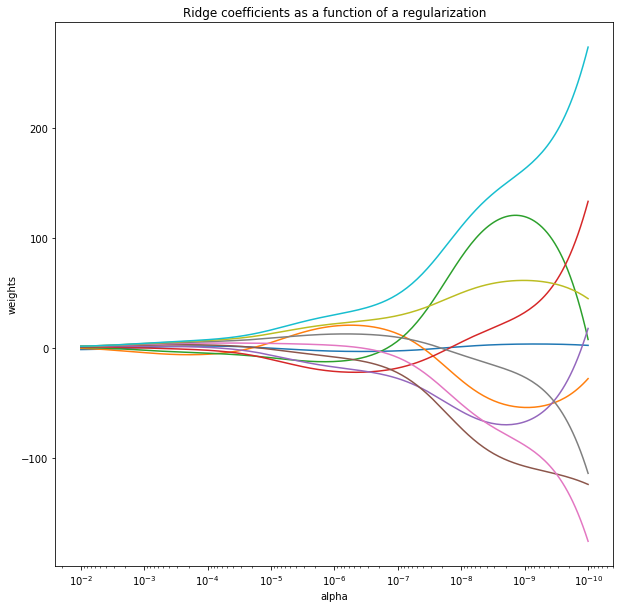

In [17]:
plt.figure(figsize=(10,10))
ax=plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of a regularization')
plt.axis('tight')
plt.show()

# Classfication of text documents using sparse features
[link](http://scikit-learn.org/stable/auto_examples/text/document_classification_20newsgroups.html#sphx-glr-auto-examples-text-document-classification-20newsgroups-py)

The dataset used in this example is the 20 newsgroups dataset. It will be automatically downloaded, then cached.

In [1]:
import ssl

# This restores the same behavior as before.
ssl._create_default_https_context = ssl._create_unverified_context

# Logistic Regression

In [21]:
print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler



Automatically created module for IPython interactive environment


In [22]:
digits=datasets.load_digits()
X,Y=digits.data,digits.target

In [23]:
X.shape

(1797, 64)

In [24]:
X = StandardScaler().fit_transform(X)

In [26]:
y=(Y>4).astype(np.int)

C=100.00
Sparsity with L1 penalty: 6.25%
score with L1 penalty: 0.9087
Sparsity with L2 penalty: 4.69%
score with L2 penalty: 0.9098
C=1.00
Sparsity with L1 penalty: 10.94%
score with L1 penalty: 0.9098
Sparsity with L2 penalty: 4.69%
score with L2 penalty: 0.9093
C=0.01
Sparsity with L1 penalty: 85.94%
score with L1 penalty: 0.8631
Sparsity with L2 penalty: 4.69%
score with L2 penalty: 0.8915


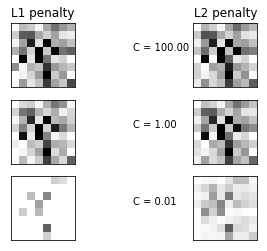

In [27]:
for i, C in enumerate((100, 1, 0.01)):
    # turn down tolerance for short training time
    clf_l1_LR = LogisticRegression(C=C, penalty='l1', tol=0.01)
    clf_l2_LR = LogisticRegression(C=C, penalty='l2', tol=0.01)
    clf_l1_LR.fit(X, y)
    clf_l2_LR.fit(X, y)

    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()

    # coef_l1_LR contains zeros due to the
    # L1 sparsity inducing norm

    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100

    print("C=%.2f" % C)
    print("Sparsity with L1 penalty: %.2f%%" % sparsity_l1_LR)
    print("score with L1 penalty: %.4f" % clf_l1_LR.score(X, y))
    print("Sparsity with L2 penalty: %.2f%%" % sparsity_l2_LR)
    print("score with L2 penalty: %.4f" % clf_l2_LR.score(X, y))

    l1_plot = plt.subplot(3, 2, 2 * i + 1)
    l2_plot = plt.subplot(3, 2, 2 * (i + 1))
    if i == 0:
        l1_plot.set_title("L1 penalty")
        l2_plot.set_title("L2 penalty")

    l1_plot.imshow(np.abs(coef_l1_LR.reshape(8, 8)), interpolation='nearest',
                   cmap='binary', vmax=1, vmin=0)
    l2_plot.imshow(np.abs(coef_l2_LR.reshape(8, 8)), interpolation='nearest',
                   cmap='binary', vmax=1, vmin=0)
    plt.text(-8, 3, "C = %.2f" % C)

    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())

plt.show()